# **Question 1**

**Round off error in long term integrations of planetary orbits**

Modelling the growth of the error over N operations as a random walk gives *Brouwer's Law*, which states that the total error after N steps will be $$ \approx \sqrt{N}\epsilon$$ where $\epsilon \sim 10^{-16}$ for a double precision float.

The *semi-implicit Euler method* involves updating the velocity and position of the planet from timestep *n* to timestep $n + 1$ according to
$$ v_{n+1} = v_n + a_n\Delta t$$
$$ = v_n - \frac{\mu x_n}{r^3}\Delta t$$
$$ x_{n+1} = x_n + v_{n+1}\Delta t$$

with r = radius of Earth from the Sun and $\mu$ is the gravitational parameter of the sun (also called $GM$).
In this scheme, the velocity is updated first using the acceleration, and then the value of position is updated using the new velocity.

### a) **Semi-Implicit Euler Method**
Write a code which uses the semi-implicit Euler method to follow the Earth's orbit around the sun. Integrate the orbit for 1 year and plot orbit in the x-y plane to check the Earth moves as expected.

Assume:
- $\mu \approx (GM)_{Sun} = 1.3271 \times 10^{20}$ N
- $1 AU = 1.496 \times 10^{11}$ m

$$F = ma = \frac{\mu m}{r^2}$$
$$ \therefore a = \frac{\mu}{r^2}$$


In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Set Up Variables
gm_Sun = 1.3271 * (10**20) # Newtons
rad = 1.496 * (10**11) # Metres

# Sun at origin
x_0 = rad # Initial Earth coordinates on the x-axis
vy_0 = (2*np.pi*rad)/(365.25 * 86400) # v = d/t = 2*pi*r/t

n = int(365.25 * 86400) # approximate number of seconds in 1 year
dt = 1 # Delta t is 1 second

def update_v(v, gm, x, rad, dt):
    new_v = v - (gm*x)/(rad**3)*dt
    return new_v

def update_x(x, new_v, dt):
    new_x = x + new_v * dt
    return new_x

In [17]:
x = np.zeros(n)
y = np.zeros(n) # Initial y = 0
vx = np.zeros(n)# Initial vx = 0
vy = np.zeros(n)

x[0] = x_0
vy[0] = vy_0

for i in range(0, int(365.25 * 86400) - 1, dt):
    rad = (x[i]**2 + y[i]**2)**0.5
    vx[i+1] = update_v(vx[i], gm_Sun, x[i], rad, dt)
    vy[i+1] = update_v(vy[i], gm_Sun, y[i], rad, dt)

    x[i+1] = update_x(x[i], vx[i+1], dt)
    y[i+1] = update_x(y[i], vy[i+1], dt)
  

Text(0.5, 1.0, 'Orbit of Earth over 1 year')

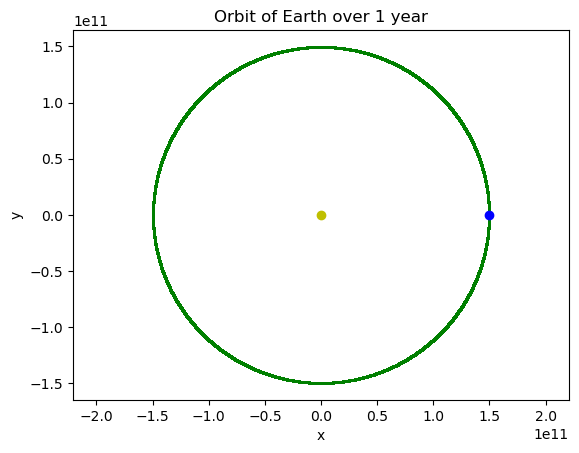

In [18]:
plt.plot(x, y, 'go', markersize = 1, label = 'Orbit Path')
plt.plot(0, 0, 'yo', label = 'Sun')        #yellow marker for the sun
plt.plot(x[0], 0, 'bo', label = 'Earth Initial Positon')  #dark blue marker for earth's initial position
plt.axis('equal')
plt.xlabel ('x')
plt.ylabel ('y')
plt.title("Orbit of Earth over 1 year")
#plt.legend()

### b) **Fractional Energy Change**

Using different timesteps $\Delta t$ ranging from $\Delta t = 0.1 years$ to $\approx 10^{-9} years (\approx 0.04 seconds)$, plot the fractional energy change $\frac{\Delta E}{E}$ against timestep $\Delta t$ and number of steps $N$.
$$\frac{\Delta E}{E} = \frac{E_{final} - E_{initial}}{E_{initial}}$$
$$E = E_{grav} + E_{kinetic} =-\frac{GMm}{r} + {\frac{1}{2} mv^2} = -\frac{\mu}{r} + \frac{1}{2} mv^2$$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set Up Variables
gm_Sun = 1.3271 * (10**20) # Newtons
rad = 1.496 * (10**11) # Metres

# Sun at origin
x_0 = rad # Initial Earth coordinates on the x-axis
vy_0 = (2*np.pi*rad)/(365.25 * 86400) # v = d/t = 2*pi*r/t

n = int(365.25 * 86400) # approximate number of seconds in 1 year
dt = 1 # Delta t is 1 second

def update_v(v, gm, x, rad, dt):
    new_v = v - (gm*x)/(rad**3)*dt
    return new_v

def update_x(x, new_v, dt):
    new_x = x + new_v * dt
    return new_x

x = np.zeros(n)
y = np.zeros(n) # Initial y = 0
vx = np.zeros(n)# Initial vx = 0
vy = np.zeros(n)

x[0] = x_0
vy[0] = vy_0

for i in range(0, int(365.25 * 86400) - 1, dt):
    rad = (x[i]**2 + y[i]**2)**0.5
    vx[i+1] = update_v(vx[i], gm_Sun, x[i], rad, dt)
    vy[i+1] = update_v(vy[i], gm_Sun, y[i], rad, dt)

    x[i+1] = update_x(x[i], vx[i+1], dt)
    y[i+1] = update_x(y[i], vy[i+1], dt)
  